# Code for BB84  protocol

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string
import os

#Function for assigning Standard (s) or Hadamard (h) measurement basis
def randomString(stringLength=2):
    """ Generate a random string of fixed length """
    basis = 'sh'
    return ''.join(random.choice(basis) for i in range(stringLength))

#Function for executing the BB84 protocol using n qubits and N check-bits
def BB84(n,N,Eve=True,Strings=False):
    """    
    BB84(n,N)
    
    n: Number of bits to be used for the key
    
    N: Number of bits to be checked
    
    Eve: Default True. If True, Eve will be present in the protocol. If False, Eve will not be present.
    
    Stings: Default False. If True, return Alice's , Bob's and Eve's:
    1- initial bit strings
    2- keys
    3- initial basis used
    4- check bit sequence
    
    --------
    
    Returns
    
    R: List of strings of "OK" and "ABORT" that indicate when Eve has been detected
    
    a: List of Alice's bits
    b: List of Bob's bits
    e: List of Eve's bits
    x: List of Alice's key
    y: List of Bob's key
    z: List of Eve's key
    
    aa: List of Alice's bases assignments
    bb: List of Bob's bases assignments
    ee: List of Eve's bases assignments
    
    xx: List of Alice's check-bits
    yy: List of Bob's check-bits
    
    """
    
    a=[]
    b=[]
    e=[]
    x=[]
    y=[]
    z=[]
    
    aa=randomString(n)  #Alice's bases assignment
    bb=randomString(n)  #Bob's bases assignment
    if Eve==True:
        ee=randomString(n)  #Eve's bases assignment (when present)
    else:
        ee=aa  #When Eve's not present, she can be thought of as being present, but having exactly the same bit-string as Alice
    
    #Generate a,b,e and x,y,z
    for i in range(n):
        a.append(random.randint(0,1))
        if ee[i]==aa[i]:
            e.append(a[i])
        else:
            e.append(random.randint(0,1))
        if bb[i]==ee[i]:
            b.append(e[i])
        else:
            b.append(random.randint(0,1))
        if aa[i]==bb[i]:
            x.append(a[i])
            y.append(b[i])
            z.append(e[i])

    R=[]

    for j in N:
        if j<=len(x):
            s=random.sample(range(len(x)),j)  #Choice of check-bits
            xx=[]
            yy=[]
            for i in range(j):  #Generate xx,yy
                xx.append(x[s[i]])
                yy.append(y[s[i]])
            if xx!=yy:  #Check for Eve's presence
                R.append('ABORT')  #Eve detected
            else:
                R.append('OK')     #Eve not detected
        else:
            break
    
    if Strings==False:
        return R
    if Strings==True:
        return R,a,b,e,aa,bb,ee,x,y,z,xx,yy,s

# One instance of BB84

In [2]:
R,a,b,e,aa,bb,ee,x,y,z,xx,yy,s=BB84(128,range(3),Strings=True)
print("Alice's Check sequence: ",xx)
print("Bob's Check sequence:   ",yy)
print('qubits checked are # :  ',s)
print("Result of Simulation: ",R[-1])

Alice's Check sequence:  [1, 1]
Bob's Check sequence:    [1, 0]
qubits checked are # :   [39, 10]
Result of Simulation:  ABORT


In [3]:
print("Alice's keys: ",x)
print()
print("Bobs's keys: ",y)
print()
print("Eve's keys: ",z)
print()
print("Alice's Basis: ",aa)
print()
print("Bobs's Basis: ",bb)
print()
print("Eve's Basis: ",ee)

Alice's keys:  [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]

Bobs's keys:  [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1]

Eve's keys:  [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Alice's Basis:  hhhshhhshhshhhhssshssssssshhshsssshshsssshhhhhhssshssshhhhhhhhhssshshsshshhshhhssshsshhssssssshshshhshshshhshhhshshhsshhshhhhhsh

Bobs's Basis:  shhshhhshhsshhhhssshhhhshhsssshshshhsshhhshhhssshshshshssshhsshsshhshsssssshhshshhhshshhhshshhhsssshhsshsshsssshssshshshhhsshhss

Eve's Basis:  hhshhshhsssssssshhshhhhhhssssshhhsshhhssshsshshhhhshs

# Simulation of the BB84 protocol

In [9]:
k1=512  #Number of sample points
k2=256  #Number of iterations of BB84
n=128   #Number of qubits
N=[1,2,4,8,16]  #Number of check-bits

dist=np.empty([k1,len(N)])  #Probability distribution

#Generate dist,avrg
for j in range(k1):  #Loop for generating dist
    abort=np.zeros(len(N),int) #Number of ABORT
    for i in range(k2):  #Loop for executing BB84
        R=BB84(n,N)
        for m in range(len(N)): #Loop for each N
            if R[m]=='ABORT': #Check for ABORT results
                abort[m]+=1
    pabort=abort/k2  #Experimental probability of ABORT
    dist[j]=pabort

avrg=np.mean(dist,axis=0) #Average of each column of dist

# Now we use Matplotlib's hist function to draw a distribution 

and see what is the average value of finding Eve for the given parameters.



## For one plot

plots_BB84 already exits!


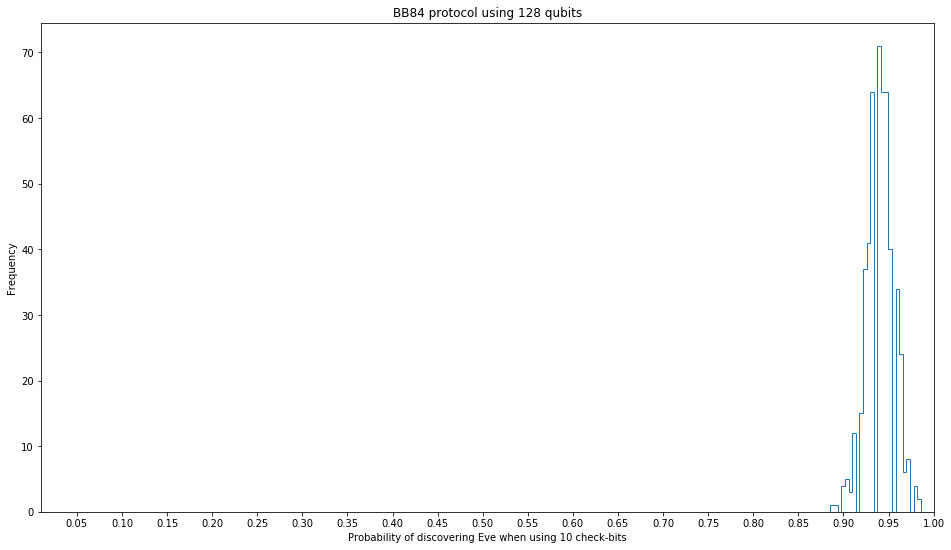

In [5]:
#Where to store the plots
outpath='plots_BB84'

#Check if folder exists
if outpath not in os.listdir():
    os.mkdir(outpath)
else: 
    print(outpath,'already exits!')

#How many qubits to inspect
qb=10

#Configuration for the plots
start = 0
stop  = 1
step  = .05
bins=np.linspace(start, stop, num=250)
    
    
#Making 1 single plot
#Specifing qb changes the plot
plt.figure(num=qb,figsize=(16,9),)
count,val,_=plt.hist(dist[:,qb-1],bins=bins,align='left',histtype='step' )
# Min,Max=val[0],val[-1]
# ticks=np.arange(Min,Max,step=.01)
# ll=['%.3f' %a for a in val]
plt.xticks(np.arange(start, stop+step, step))
# plt.xticks(ticks=val[::18],labels=ll[::18])
plt.xlabel('Probability of discovering Eve when using %i check-bits' %N[qb-1])
plt.ylabel('Frequency')
plt.xlim(0.01,1.0)
plt.title('BB84 protocol using %i qubits'%n)
plt.savefig(outpath+'/'+'BB84-dist with %i check-bits'%N[qb-1],dpi=200)
plt.show()
plt.close()

## For all plots individually

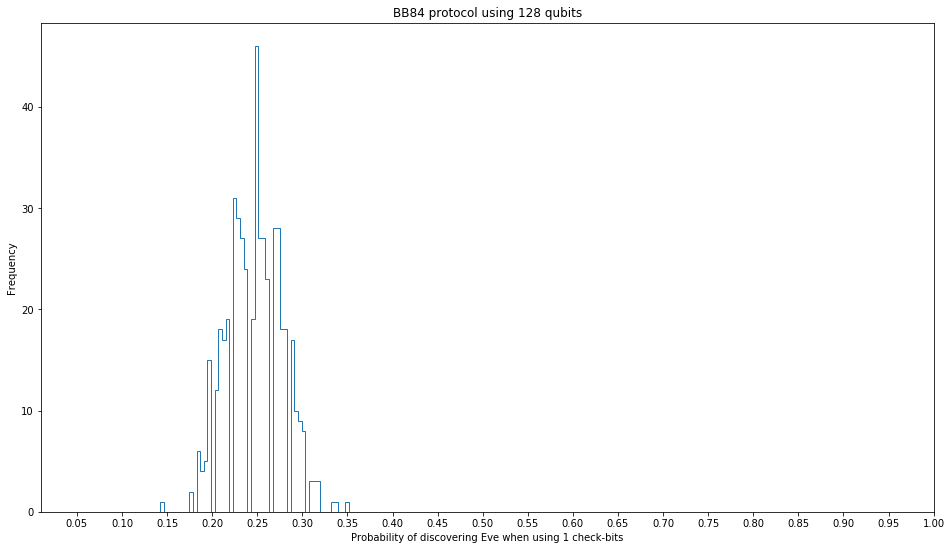

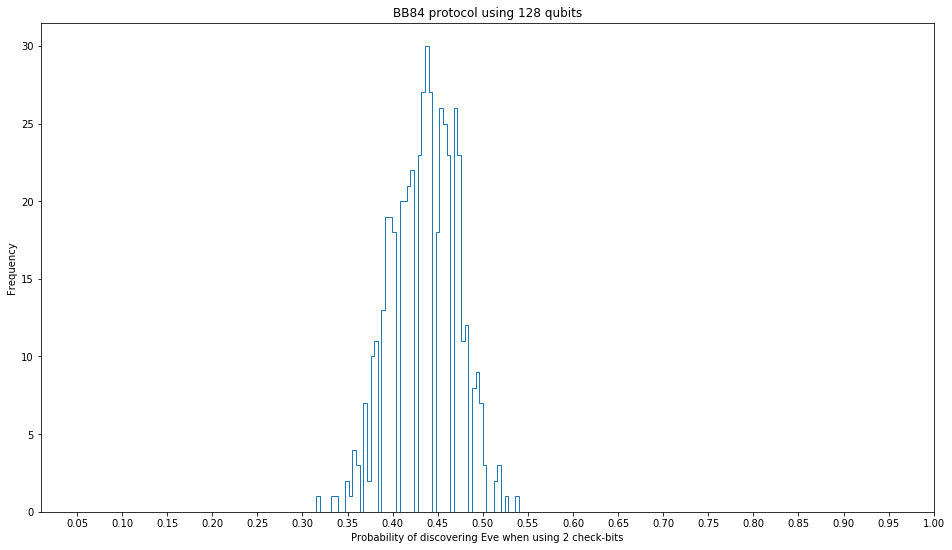

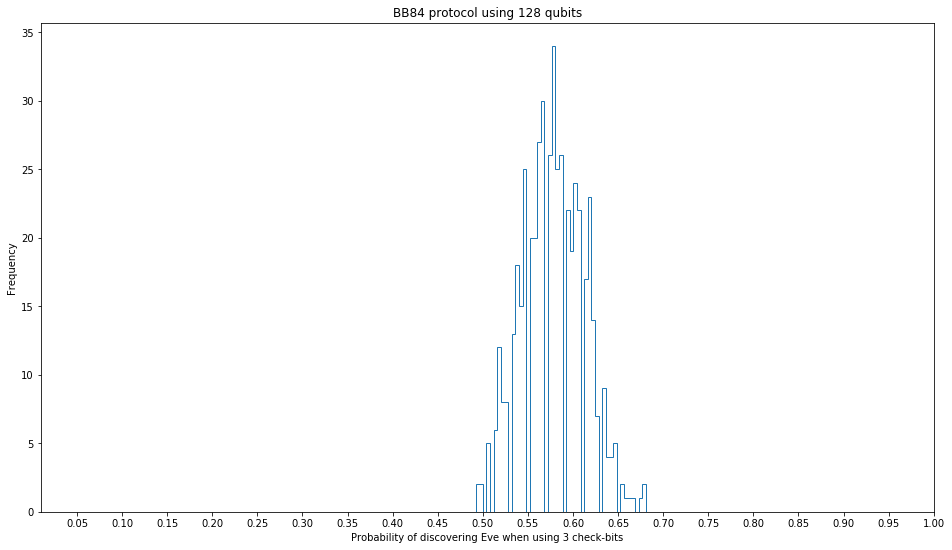

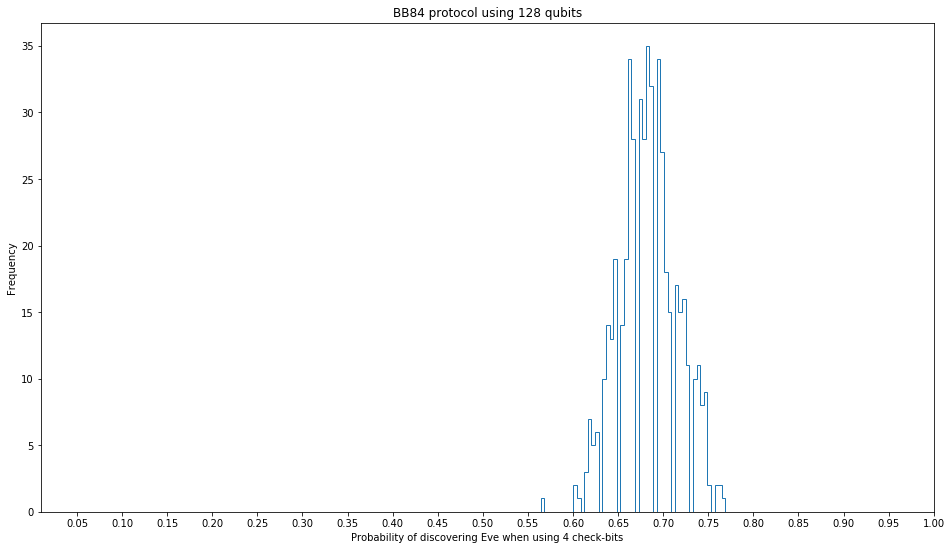

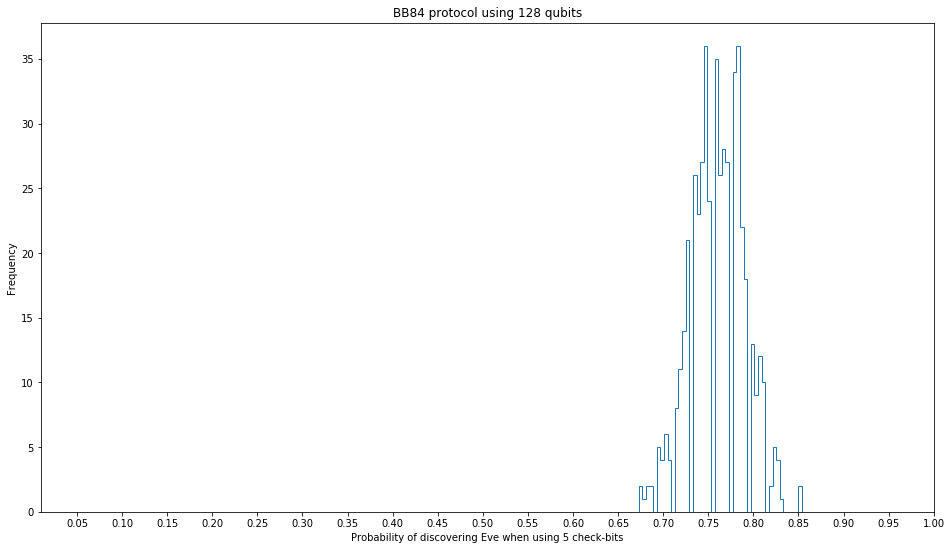

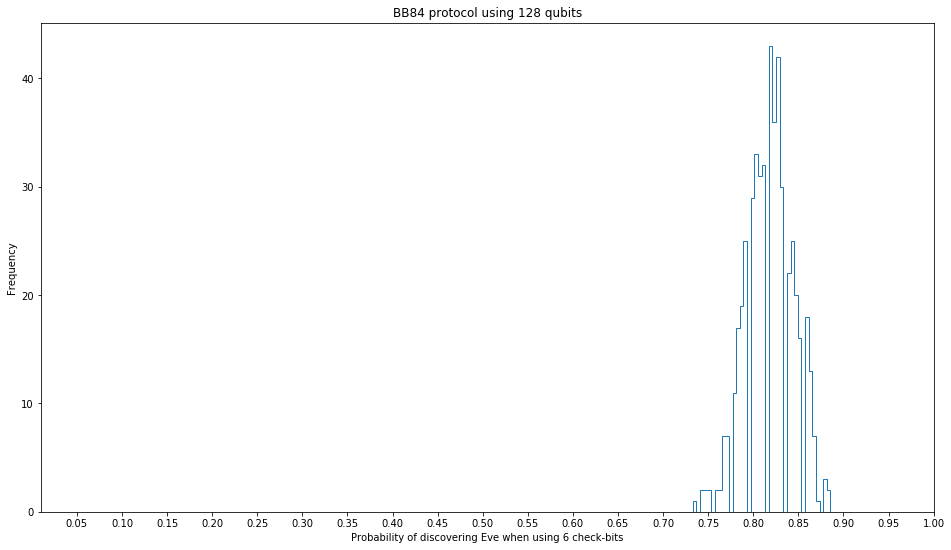

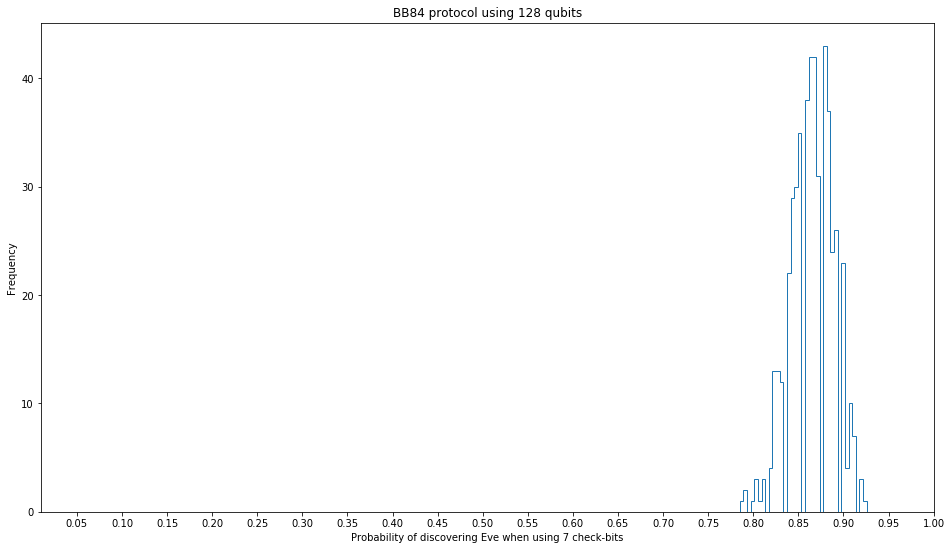

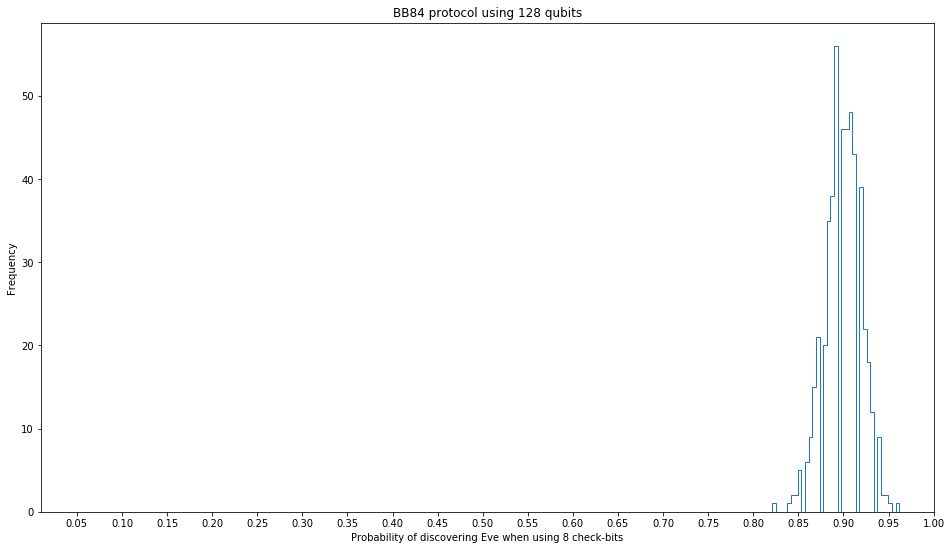

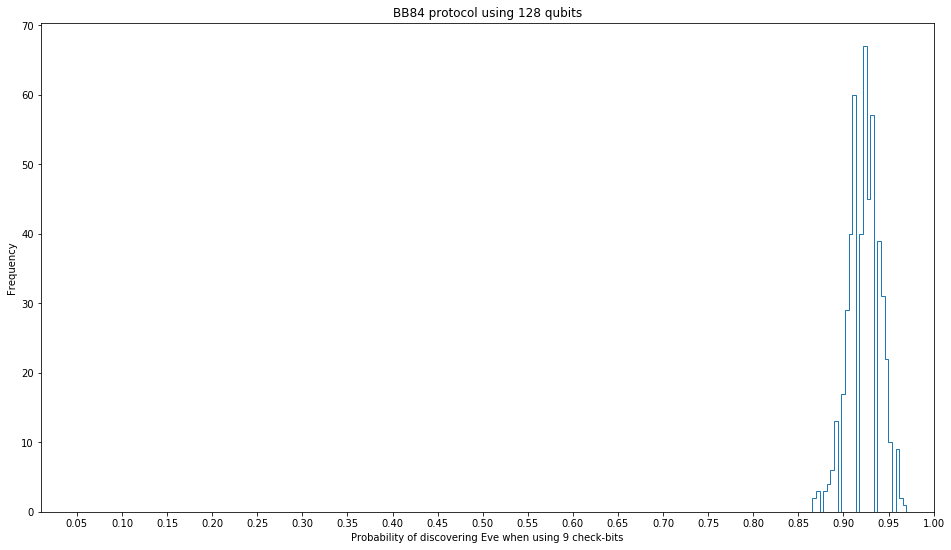

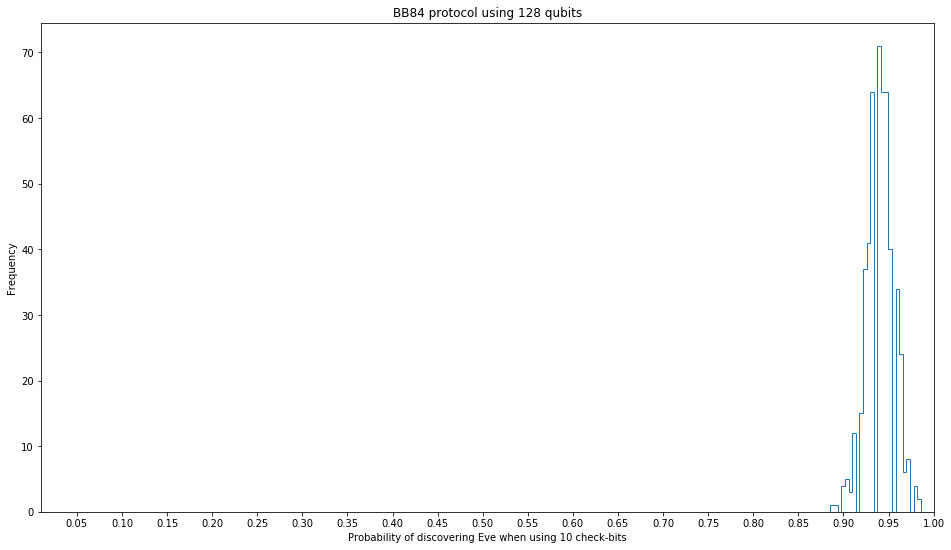

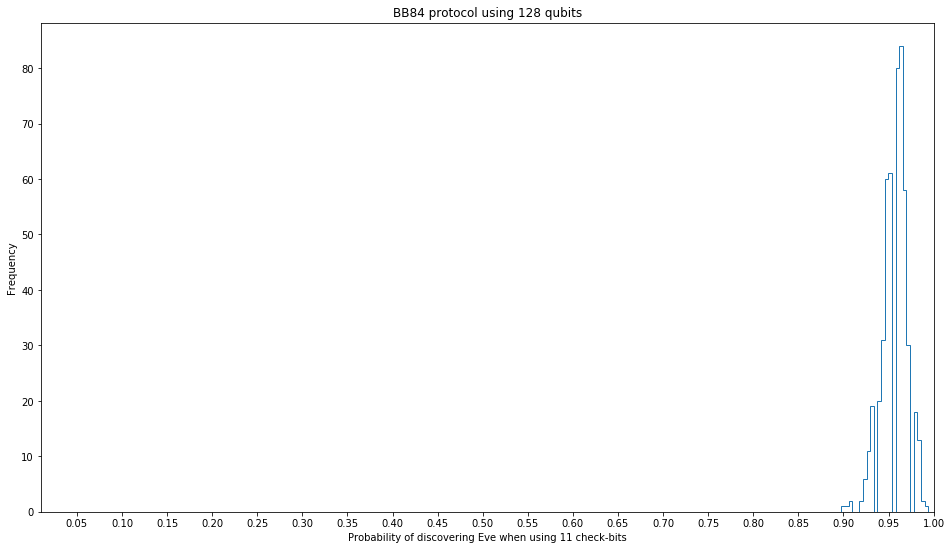

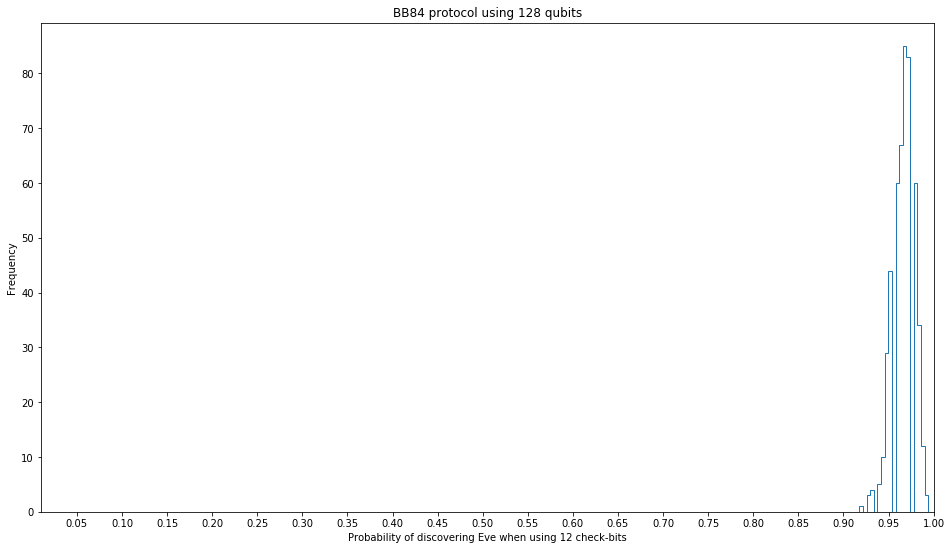

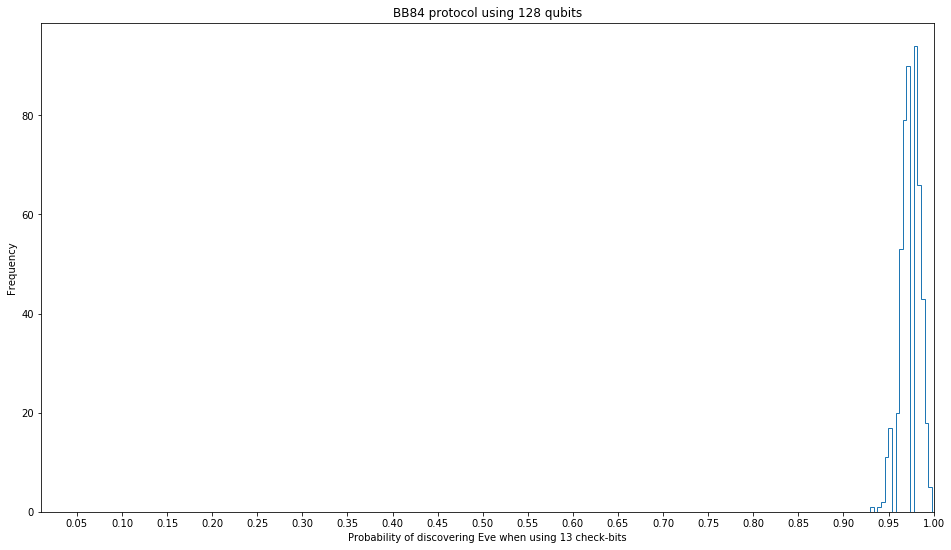

KeyboardInterrupt: 

In [6]:
for qb in range(len(N)):
    count,val=[],[]
    plt.figure(num=qb,figsize=(16,9))
    count,val,_=plt.hist(dist[:,qb],bins=bins,align='left',histtype='step' )
    plt.xticks(np.arange(start, stop+step, step))
    plt.xlabel('Probability of discovering Eve when using %i check-bits' %N[qb])
    plt.ylabel('Frequency')
    plt.xlim(0.01,1.0)
    plt.title('BB84 protocol using %i qubits'%n)
    plt.savefig(outpath+'/'+'BB84-dist with %i check-bits'%N[qb],dpi=500)
    plt.show()
    plt.close()

## A Closer look

In [ ]:
for qb in range(len(N)):
    count,val=[],[]
    plt.figure(num=qb,figsize=(16,9))
    count,val,_=plt.hist(dist[:,qb],bins=50,align='left',histtype='step' )
    ll=['%.3f' %a for a in val]
    plt.xticks(ticks=val[::3],labels=ll[::3])
    plt.xlabel('Probability of discovering Eve when using %i check-bits' %N[qb])
    plt.ylabel('Frequency')
#     plt.xlim(0.1,1)
    plt.title('BB84 protocol using %i qubits'%n)
    plt.savefig(outpath+'/'+'CloserLook_BB84-dist with %i check-bits'%N[qb],dpi=500)
    plt.show()
    plt.close()

## A few of them together

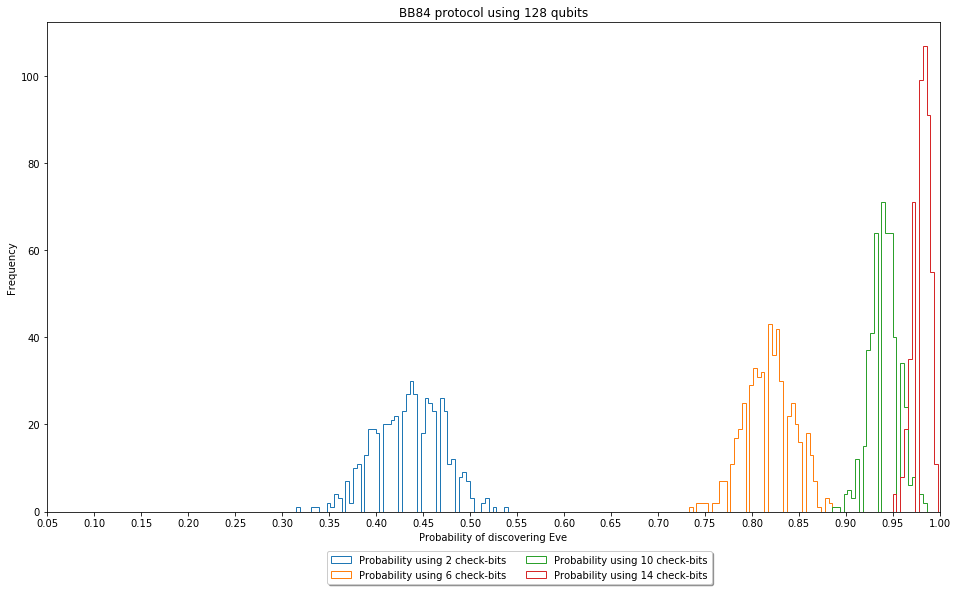

In [7]:
plt.figure(figsize=(16,9))
start = 0
stop  = 1
step  = .05
bins=np.linspace(start, stop, num=250)

for qb in range(1,len(N),4):
  # count,val=[],[]  
  count,val,_=plt.hist(dist[:,qb],align='left',histtype='step',label='Probability using %i check-bits' %N[qb],bins=bins )
plt.xticks(np.arange(start, stop+step, step))
plt.xlabel('Probability of discovering Eve')
plt.ylabel('Frequency')
plt.xlim(0.05,1.0)
# plt.grid(axis='x')
plt.legend(bbox_to_anchor=(0.75, -0.07),ncol=2,shadow=True)
plt.title('BB84 protocol using %i qubits'%n)
plt.savefig(outpath+'/'+'BB84-dist-superimposed',dpi=500)
plt.show()

In [ ]:
c=list(count)
maxprobindex=c.index(max(c))
val[maxprobindex]

In [ ]:
# print(p)
P=1-(.75)**N
print(P)
# print(np.e)

In [ ]:
rse=np.sqrt((avrg-P)**2)
print('rse: \n',rse)
Error=avrg-P
print("Error: \n",Error)

abserr=np.abs(avrg-P)
print('abserr: \n',abserr)

print('Is root squared error same as absolute error?:\n', rse==abserr)

In [ ]:
# for i in range(len(N)):
# count,val=[],[]
plt.figure(figsize=(16,9))
plt.bar(N,avrg)
plt.plot(N,avrg,'--k')
plt.plot(N,P,'sk')
plt.xticks(ticks=N)
plt.yticks(ticks=np.arange(start,stop+step,2*step))
plt.xlabel('Number of Check-bits')
plt.ylabel('Average Prob of Discovering Eve')
plt.title('BB84 Protocol when varying amount of check-bits')
plt.grid(axis='y',color='r',linestyle='--',alpha=.7)
plt.savefig(outpath+'/'+'BB84-prob-per-Check-bits',dpi=500)
plt.show()